Comparamos os resultados já calculados para MCA, SMO utilizando as equações com $n_k$ contínuo e SMO simulado com $n_k$ discreto.  

<h2> Libraries </h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math as mt
from scipy.optimize import curve_fit

import os

<h2> Global Parameters </h2>

In [2]:
time_init           = 1
time_final          = 10**8

n_particles         = 2000

coag_const          = 150
frag_const          = 0.0

m_min               = 1

list_diffusion_exponents = [-1.0, -0.5, -0.0]
list_area_exponents      = [0.0]

In [3]:
CONTINUOUS          = True
DISCRETE            = True

In [4]:
result_dir = os.path.join("figs")
print(result_dir)

figs


In [5]:
try:
    os.makedirs(result_dir)
except:
    pass

In [6]:
output_prefix = "coag_"+str(coag_const)+"_frag_"+str(frag_const)+"_"

<h2> MCA </h2>

Plotting MCA results with power laws. 

In [8]:
m_data_dict = {}
m_time_dict = {}
for diffusion_exponent in list_diffusion_exponents:
    for area_exponent in list_area_exponents:
        source_dir = os.path.join("diff_%.2f"%diffusion_exponent, "area_%.2f"%area_exponent, "coag_"+str(coag_const), "frag_"+str(frag_const))
        mca_source_dir = os.path.join(source_dir, "mca","")
        data_file = open(os.path.join(mca_source_dir,"mca_result.dat"), "r")
        m_data_dict[diffusion_exponent] = []
        m_time_dict[diffusion_exponent] = []
        for line in data_file.readlines():
            line_splitted = line.split() 
            if line_splitted[0] != "#":
                m_time_dict[diffusion_exponent].append(float(line_splitted[0]))
                m_data_dict[diffusion_exponent].append(float(line_splitted[1]))

        data_file.close()


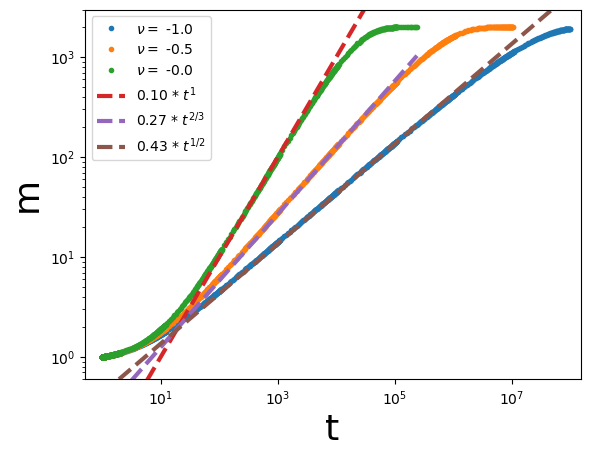

In [9]:
plt.figure()
plt.loglog()
plt.xlabel("t", fontsize=26)
plt.ylabel("m", fontsize=26)

plt.xlim((0.5 * time_init, 1.5 * time_final))
plt.ylim((0.6 * m_min, 1.5 * n_particles))

for diffusion_exponent in list_diffusion_exponents:
    plt.plot(m_time_dict[diffusion_exponent], m_data_dict[diffusion_exponent], ".", label=r"$\nu =$"+" %.1f"%diffusion_exponent)

if 0.0 in list_diffusion_exponents:
    b_1 = 0.1
    plt.plot(m_time_dict[0.0], b_1*np.array(m_time_dict[0.0])**1.0, "--", label = "%.2f"%b_1 +" * "+r"$t^1$", linewidth = 3)
    
if -0.5 in list_diffusion_exponents:
    b_2_3 = 0.27
    plt.plot(m_time_dict[0.0], b_2_3*np.array(m_time_dict[0.0])**0.666, "--", label = "%.2f"%b_2_3 +" * "+r"$t^{2/3}$", linewidth = 3)    
    
if -1.0 in list_diffusion_exponents:
    b_1_2 = 0.43
    plt.plot(m_time_dict[-1.0], b_1_2*np.array(m_time_dict[-1.0])**0.5, "--", label = "%.2f"%b_1_2 +" * "+r"$t^{1/2}$", linewidth = 3)    

plt.legend()
plt.savefig(os.path.join("figs", output_prefix+"mca_comp_expo.png"),bbox_inches='tight', dpi=200)
plt.show()

<h2> SMO </h2>

Plotting Smoluchowski coagulation equation results

In [10]:
if DISCRETE:
    sd_data_dict = {}
    sd_time_dict = {}


    for diffusion_exponent in list_diffusion_exponents:
        source_dir = os.path.join("diff_%.2f"%diffusion_exponent, "area_%.2f"%area_exponent, "coag_"+str(coag_const), "frag_"+str(frag_const))
        smo_disc_source_dir = os.path.join(source_dir, "smo_disc","")
        file_name = "smo_result.dat"
        data_file = open(os.path.join(smo_disc_source_dir,file_name), "r")
    
        sd_data_dict[diffusion_exponent] = []
        sd_time_dict[diffusion_exponent] = []
        for line in data_file.readlines():
            line_splitted = line.split() 
            if line_splitted[0] != "#":
                sd_time_dict[diffusion_exponent].append(float(line_splitted[0]))
                sd_data_dict[diffusion_exponent].append(float(line_splitted[1]))
            
        data_file.close()

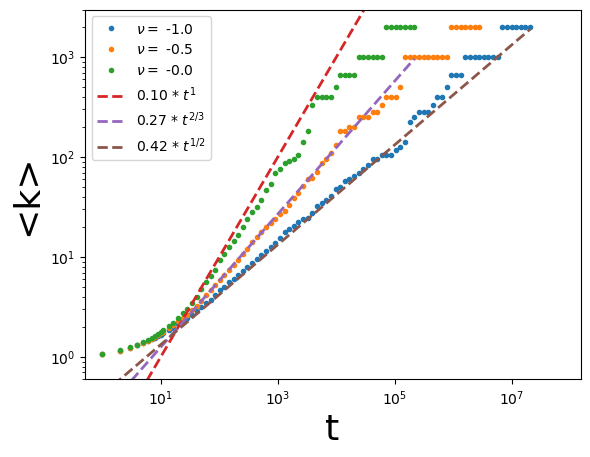

In [11]:
if DISCRETE:
    plt.figure()
    plt.loglog()
    plt.xlabel("t", fontsize=26)
    plt.ylabel("<k>", fontsize=26)

    plt.xlim((0.5 * time_init, 1.5 * time_final))
    plt.ylim((0.6 * m_min, 1.5 * n_particles))

    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sd_time_dict[diffusion_exponent], sd_data_dict[diffusion_exponent], ".", label=r"$\nu =$"+" %.1f"%diffusion_exponent)
        
    if 0.0 in list_diffusion_exponents:
        b_1 = 0.1
        plt.plot(sd_time_dict[0.0], b_1*np.array(sd_time_dict[0.0])**1.0, "--", label = "%.2f"%b_1 +" * "+r"$t^{1}$", linewidth = 2)

    if -0.5 in list_diffusion_exponents:
        b_2_3 = 0.27
        plt.plot(sd_time_dict[0.0], b_2_3*np.array(sd_time_dict[0.0])**0.666, "--", label = "%.2f"%b_2_3 +" * "+r"$t^{2/3}$", linewidth = 2)    

    if -1.0 in list_diffusion_exponents:
        b_1_2 = 0.42
        plt.plot(sd_time_dict[-1.0], b_1_2*np.array(sd_time_dict[-1.0])**0.5, "--", label = "%.2f"%b_1_2 +" * "+r"$t^{1/2}$", linewidth = 2)     

    
    plt.legend()
    plt.savefig(os.path.join("figs", output_prefix+"smo_comp_disc_expo.png"),bbox_inches='tight', dpi=200)
    plt.show()

In [22]:
if CONTINUOUS:
    sc_data_dict = {}
    sc_time_dict = {}

    for diffusion_exponent in list_diffusion_exponents:
    
        source_dir = os.path.join("diff_%.2f"%diffusion_exponent, "area_%.2f"%area_exponent, "coag_"+str(coag_const), "frag_"+str(frag_const))
        smo_cont_source_dir = os.path.join(source_dir, "smo_cont","")
        file_name = "smo_result.dat"
        data_file = open(os.path.join(smo_cont_source_dir,file_name), "r")
        
        sc_data_dict[diffusion_exponent] = []
        sc_time_dict[diffusion_exponent] = []
        for line in data_file.readlines():
            line_splitted = line.split() 
            if line_splitted[0] != "#":
                sc_time_dict[diffusion_exponent].append(float(line_splitted[0]))
                sc_data_dict[diffusion_exponent].append(float(line_splitted[1]))
                
        data_file.close()

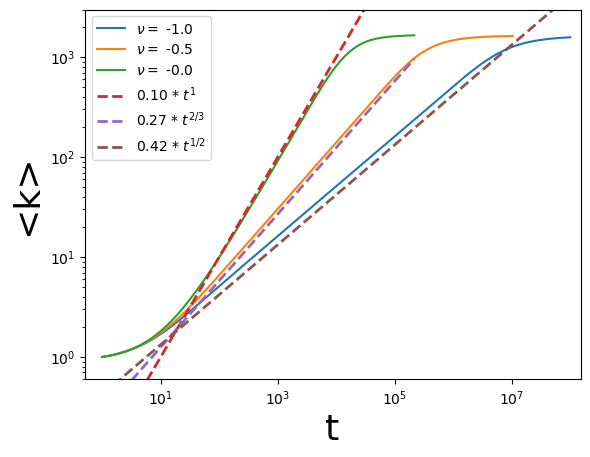

In [23]:
if CONTINUOUS:
    plt.figure()
    plt.loglog()
    plt.xlabel("t", fontsize=26)
    plt.ylabel("<k>", fontsize=26)

    plt.xlim((0.5 * time_init, 1.5 * time_final))
    plt.ylim((0.6 * m_min, 1.5 * n_particles))



    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sc_time_dict[diffusion_exponent], sc_data_dict[diffusion_exponent], "-", 
                 label=r"$\nu =$"+" %.1f"%diffusion_exponent)    
        
    if 0.0 in list_diffusion_exponents:
        b_1 = 0.1
        plt.plot(sc_time_dict[0.0], b_1*np.array(sc_time_dict[0.0])**1.0, "--", label = "%.2f"%b_1 +" * "+r"$t^{1}$", linewidth = 2)

    if -0.5 in list_diffusion_exponents:
        b_2_3 = 0.27
        plt.plot(sc_time_dict[0.0], b_2_3*np.array(sc_time_dict[0.0])**0.666, "--", label = "%.2f"%b_2_3 +" * "+r"$t^{2/3}$", linewidth = 2)    

    if -1.0 in list_diffusion_exponents:
        b_1_2 = 0.42
        plt.plot(sc_time_dict[-1.0], b_1_2*np.array(sc_time_dict[-1.0])**0.5, "--", label = "%.2f"%b_1_2 +" * "+r"$t^{1/2}$", linewidth = 2)           
    
    
    plt.legend()
    plt.savefig(os.path.join("figs", output_prefix+"smo_comp_cont_expo.png"),bbox_inches='tight', dpi=200)
    plt.show()

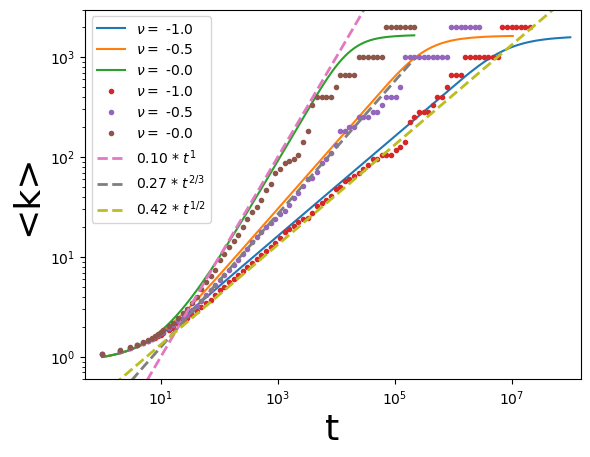

In [24]:
if CONTINUOUS and DISCRETE:
    plt.figure()
    plt.loglog()
    plt.xlabel("t", fontsize=26)
    plt.ylabel("<k>", fontsize=26)

    plt.xlim((0.5 * time_init, 1.5 * time_final))
    plt.ylim((0.6 * m_min, 1.5 * n_particles))



    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sc_time_dict[diffusion_exponent], sc_data_dict[diffusion_exponent], "-", label=r"$\nu =$"+" %.1f"%diffusion_exponent)    
        
    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sd_time_dict[diffusion_exponent], sd_data_dict[diffusion_exponent], ".", label=r"$\nu =$"+" %.1f"%diffusion_exponent)    

    if 0.0 in list_diffusion_exponents:
        b_1 = 0.1
        plt.plot(sc_time_dict[0.0], b_1*np.array(sc_time_dict[0.0])**1.0, "--", label = "%.2f"%b_1 +" * "+r"$t^{1}$", linewidth = 2)

    if -0.5 in list_diffusion_exponents:
        b_2_3 = 0.27
        plt.plot(sc_time_dict[0.0], b_2_3*np.array(sc_time_dict[0.0])**0.666, "--", label = "%.2f"%b_2_3 +" * "+r"$t^{2/3}$", linewidth = 2)    

    if -1.0 in list_diffusion_exponents:
        b_1_2 = 0.42
        plt.plot(sc_time_dict[-1.0], b_1_2*np.array(sc_time_dict[-1.0])**0.5, "--", label = "%.2f"%b_1_2 +" * "+r"$t^{1/2}$", linewidth = 2)       
    

    
    plt.legend()
    plt.savefig(os.path.join("figs", output_prefix+"smo_comp_cont_disc_expo.png.png"),bbox_inches='tight', dpi=200)
    plt.show()

<h2> MCA + SMO </h2>

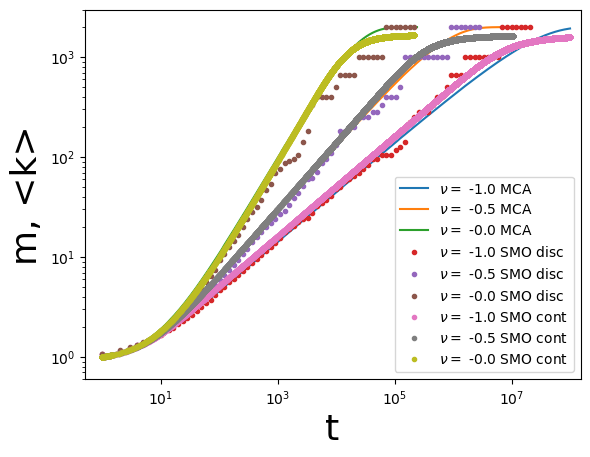

In [25]:
plt.figure()
plt.loglog()
plt.xlabel("t", fontsize=26)
plt.ylabel("m, <k>", fontsize=26)

plt.xlim((0.5 * time_init, 1.5 * time_final))
plt.ylim((0.6 * m_min, 1.5 * n_particles))

for diffusion_exponent in list_diffusion_exponents:
    plt.plot(m_time_dict[diffusion_exponent], m_data_dict[diffusion_exponent], "-", 
             label=r"$\nu =$"+" %.1f"%diffusion_exponent+" MCA")
if DISCRETE and CONTINUOUS:
    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sd_time_dict[diffusion_exponent], sd_data_dict[diffusion_exponent], ".", 
                 label=r"$\nu =$"+" %.1f"%diffusion_exponent+" SMO disc")
    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sc_time_dict[diffusion_exponent], sc_data_dict[diffusion_exponent], ".", 
                 label=r"$\nu =$"+" %.1f"%diffusion_exponent+" SMO cont")
elif DISCRETE:
    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sd_time_dict[diffusion_exponent], sd_data_dict[diffusion_exponent], ".", 
                 label=r"$\nu =$"+" %.1f"%diffusion_exponent+" SMO")
elif CONTINUOUS:
    for diffusion_exponent in list_diffusion_exponents:
        plt.plot(sc_time_dict[diffusion_exponent], sc_data_dict[diffusion_exponent], "-", 
                 label=r"$\nu =$"+" %.1f"%diffusion_exponent+" SMO")
        
        
plt.legend()
plt.savefig(os.path.join("figs", output_prefix+"smo_mca_comp_expo.png"),bbox_inches='tight', dpi=200)
plt.show()  